
Optimized kernel hyperparameters:
  sigma_f^2: 1.985921
  sigma_w^2: 0.000100
  lengthscales: (np.float64(1.7915491097284664), np.float64(2.1209113364166794))
  Log marginal likelihood: 169.5210

Test set evaluation:
  RMSE: 13.0970
  MAE:  9.1657
  NLL:  4.8790
  Mean absolute error (from list): 9.1657

First 5 predictions (index, true, pred, abs_error):
  0: 91.4700 | 89.8051 | 1.6649
  1: 94.5900 | 75.2376 | 19.3524
  2: 97.7400 | 75.3202 | 22.4198
  3: 100.4800 | 75.3938 | 25.0862
  4: 103.2600 | 75.4538 | 27.8062


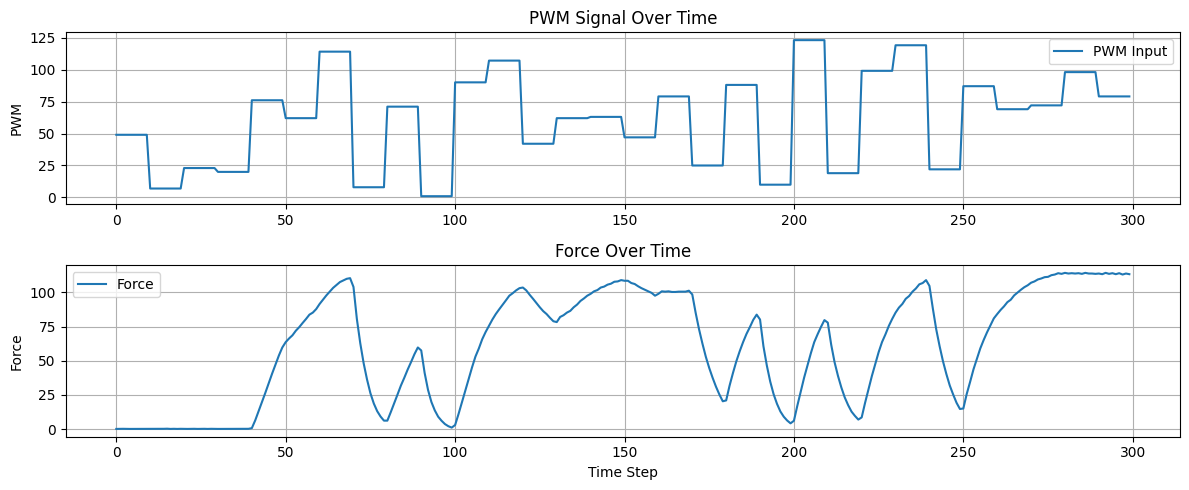

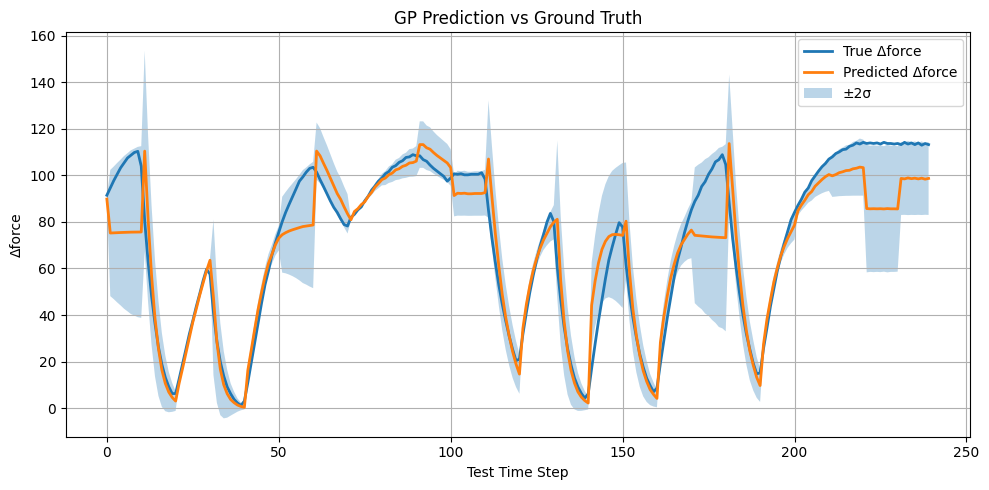

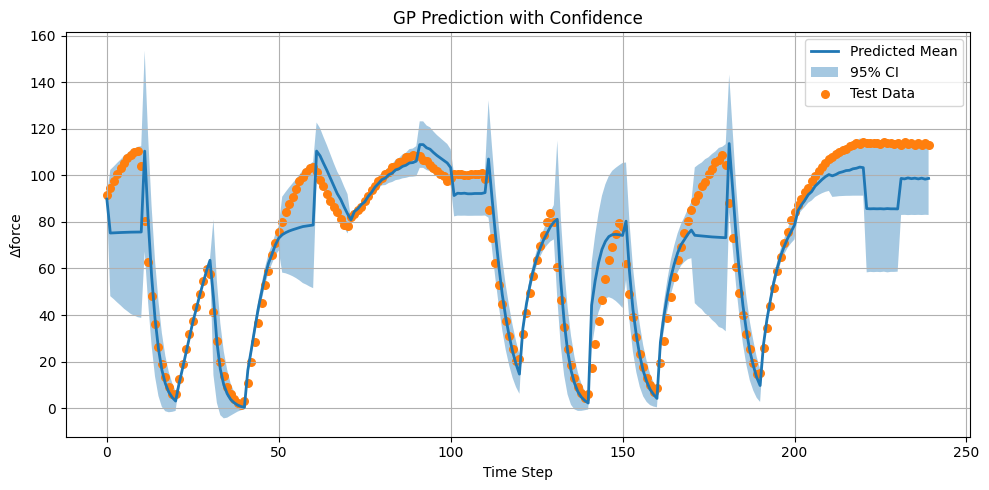

In [9]:
# main.ipynb

from gp_model import GaussianProcess, RBFKernel
from data_handler import load_pwm_force_data
from metrics import rmse, mae, negative_log_likelihood_gaussian, absolute_errors_list
from visualization import plot_pwm_force, plot_gp_prediction_vs_truth, plot_gp_confidence

import numpy as np

# 1. Load data
csv_path = "intialDataForGPR100N600Sample.csv"
(
    X_train,
    X_test,
    y_train,
    y_test,
    scaler_X,
    scaler_y,
    PWM,
    force,
) = load_pwm_force_data(csv_path)

# 2. Create kernel & GP model
initial_lengthscales = np.array([1.0, 1.0])
kernel = RBFKernel(lengthscales=initial_lengthscales, sigma_f2=1.0, sigma_w2=1e-3)

# Demonstrate operator overloading: scale kernel by 1.0 
kernel = 1.0 * kernel

gp = GaussianProcess(kernel=kernel)

# 3. Fit model
gp.fit(X_train, y_train)
print(f"\nOptimized kernel hyperparameters:")
print(f"  sigma_f^2: {gp.kernel.sigma_f2:.6f}")
print(f"  sigma_w^2: {gp.kernel.sigma_w2:.6f}")
print(f"  lengthscales: {tuple(gp.kernel.lengthscales)}")  # tuple -> immutable type
print(f"  Log marginal likelihood: {gp.log_marginal_likelihood_:.4f}")

# 4. Predict on test set
y_pred_scaled, y_std_scaled = gp.predict(X_test, return_std=True)

# Inverse-transform
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
y_true = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()
y_std = y_std_scaled * scaler_y.scale_[0]

# 5. Metrics
test_rmse = rmse(y_true, y_pred)
test_mae = mae(y_true, y_pred)
test_nll = negative_log_likelihood_gaussian(y_true, y_pred, y_std)

abs_errors = absolute_errors_list(y_true, y_pred)

print("\nTest set evaluation:")
print(f"  RMSE: {test_rmse:.4f}")
print(f"  MAE:  {test_mae:.4f}")
print(f"  NLL:  {test_nll:.4f}")
print(f"  Mean absolute error (from list): {np.mean(abs_errors):.4f}")

# Use enumerate (Requirement Part 2: enumerate/map/zip/filter/lambda/reduce)
print("\nFirst 5 predictions (index, true, pred, abs_error):")
for i, (t, p, e) in enumerate(zip(y_true, y_pred, abs_errors)):
    if i >= 5:
        break
    print(f"  {i}: {t:.4f} | {p:.4f} | {e:.4f}")

# 6. Plots
plot_pwm_force(PWM, force)
plot_gp_prediction_vs_truth(y_true, y_pred, y_std)
plot_gp_confidence(y_true, y_pred, y_std)

In [1]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
